# **다이나믹 프로그래밍(동적 계획법)**
*   메모리를 적절히 사용하여 수행 시간 효율성을 비약적으로 향상시키는 방법
*   이미 계산된 결과(작은 결과)는 별도의 메모리 영역에 저장하여 다시 계산하지 않음
*   탑다운(하향식)과 보텀업(상향식) 방식

> 프로그래밍에서 동적의 의미: 프로그램이 실행되는 도중에 메모리를 할당하는 법

> 다이나믹 프로그래밍에서는 별다른 의미없이 사용된 단어 










**탑다운: 메모이제이션**

*   한 번 계산한 결과를 메모리 공간에 메모
*   이전에 계산된 결과를 일시적으로 기록
*   같은 문제를 다시 호출하면 메모 결과를 그대로 가져옴
* 캐싱: 값을 기록해 놓음 
*   구현 과정에서 재귀 함수 이용



**보텀업**
*   반복문 이용
*   DP 테이블: 결과 저장용 리스트 



**다이나믹 프로그래밍의 조건**
1.   최적 부분 구조
*   큰 문제를 작은 문제로 나누어 작은 문제의 답을 모아서 큰 문제를 해결 

2.   중복되는 부분 문제
*   동일한 작은 문제를 반복적으로 해결





# 피보나치 수열
*   점화식: 인접한 항들 사이의 관계식
*   1, 1, 2(=1+1), 3(=1+2), 5(=2+3), 8 ...
*   f(n) = f(n-1) + f(n-2)
*   f(1) = 1, f(2) = 1

*  시간복잡도

> 세타 표기법

> 빅오 표기법: O(2 N제곱)









In [ ]:
#단순 재귀 소스코드

def fibo(x):
    if x == 1 or x == 2:
        return 1
    return fibo(x - 1) + fibo(x - 2)

print(fibo(4))

3



*   단순 재귀 함수로 피보나치를 해결하면 지수 시간 복잡도를 갖게 됨

*   여러 번 호출하게 됨(중복되는 부분 문제)



**피보나치 수열의 효율적인 해법: 다이나믹 프로그래밍**

1.   최적 부분 구조: 큰문제를 작은 문제로 나누기
2.   중복되는 부분 문제: 동일한 작은 문제를 반복적으로 해결





# 탑다운 피보나치 수열


*   다이나믹 프로그래밍 적용 > 시간복잡도: O(N)



In [ ]:
d = [0] * 100 #0부터 99까지의 인덱스를 가지면서 

def fibo(x):

  if x == 1 or x == 2:
      return 1
  
  if d[x] !=0:
      return d[x] #이미 계산한 적 있는 문제라면 그대로 반환
  
  d[x] = fibo(x - 1) + fibo(x - 2) #점화식
  return d[x]

print(fibo(99))




218922995834555169026


# 보텀업 피보나치 수열

In [ ]:
d = [0] * 100 #0부터 99까지의 인덱스를 가지면서 각 원소의 값이 0이도록 DP테이블  초기화

d[1] = 1
d[2] = 1
n = 99

for i in range(3, n + 1):
    d[i] = d[i - 1] + d[i - 2]
print(d[n])



218922995834555169026


# 다이나믹 프로그래밍 VS 분할 정복(ex 퀵정렬)


*   공통점: 최적 부분 구조
*   차이점: 부분 문제의 중복



# 다이나믹 프로그래밍 접근법
1.   그리디, 구현, 완전 탐색 등의 아이디어로 문제를 해결할 수 있는지
2.   다른 알고리즘으로 떠오르지 않으면 다이나믹 프로그래밍

3.   일단 재귀함수로 완전 탐색 코드 작성
4.   작은 문제로 사용한 값이 큰 문제에서 그대로 사용될 수 있으면 코드를 개선




# 개미 전사



*   ai = i번째 식량창고까지의 최적의 해(얻을 수 있는 식량의 최댓값)
*   ki = i번째 식량창고에 있는 식량의 양
*   ai = max(ai-1, ai-2 + ki)




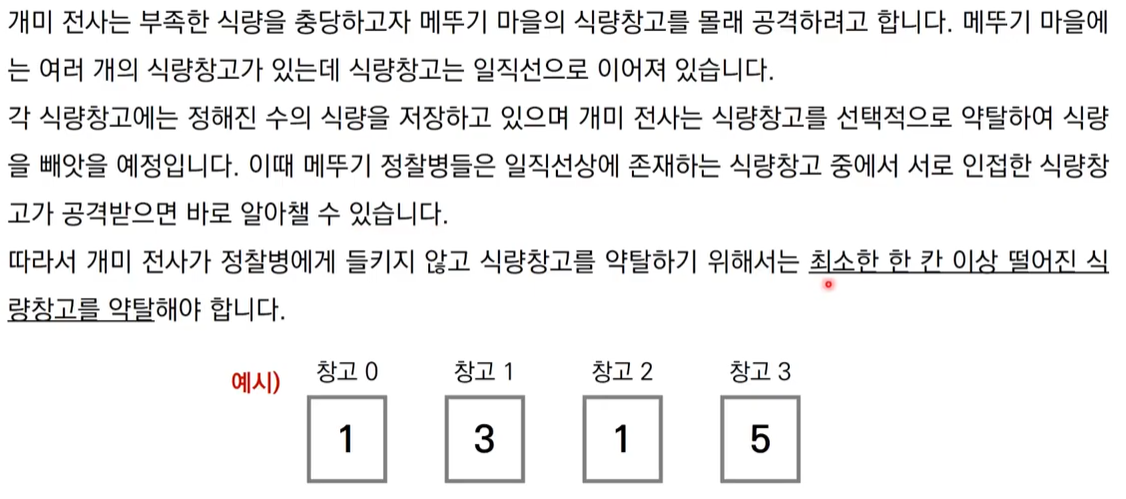

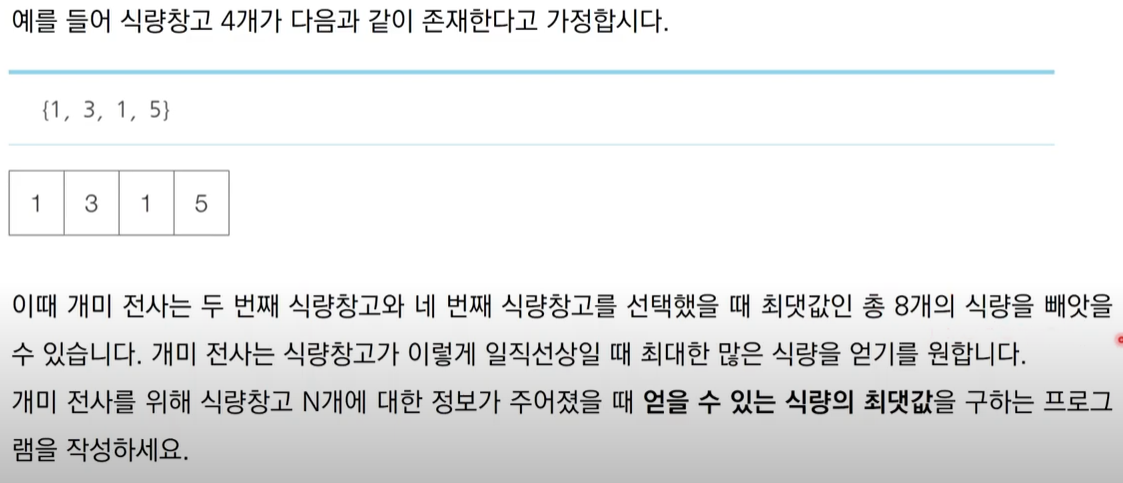

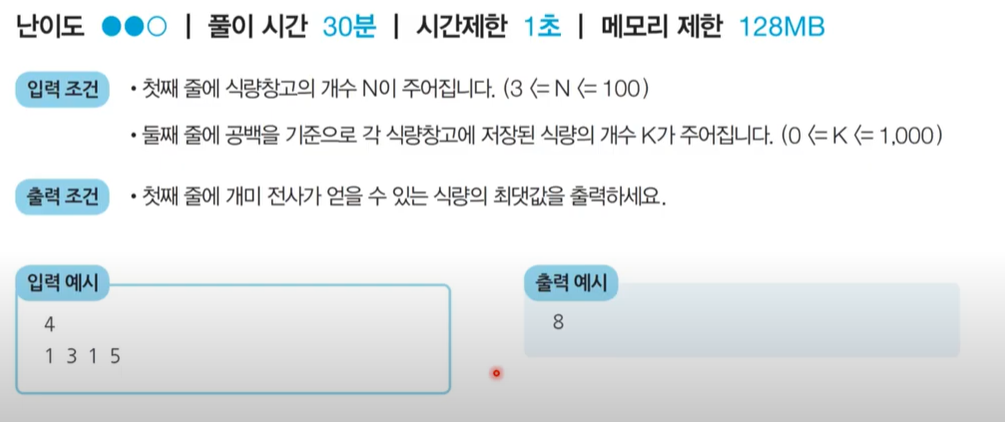

In [ ]:
n = int(input())
array = list(map(int, input().split()))

#보텀업 방식
d = [0]*100 #앞서 계산된 결과를 저장하기 위해 DP 테이블 초기화

d[0] = array[0]
d[1] = max(array[0], array[1])
for i in range(2, n):
    d[i] = max(d[i - 1], d[i - 2] + array[i])

print(d[n - 1])


4
1 3 1 5
8


# 1로 만들기
*   피보나치 수열 문제를 도식화한 것처럼 최적 부분 구조와 중복되는 부분문제 만족
*   ai = i를 1로 만들기 위한 최소 연사 횟수
*   ai = min(ai-1, ai/2, ai/3, ai/5) + 1
*   1을 빼는 연산을 제외하고는 해당 수로 나누어떨어질 때에 한해 점화식을 적용할 수 있음



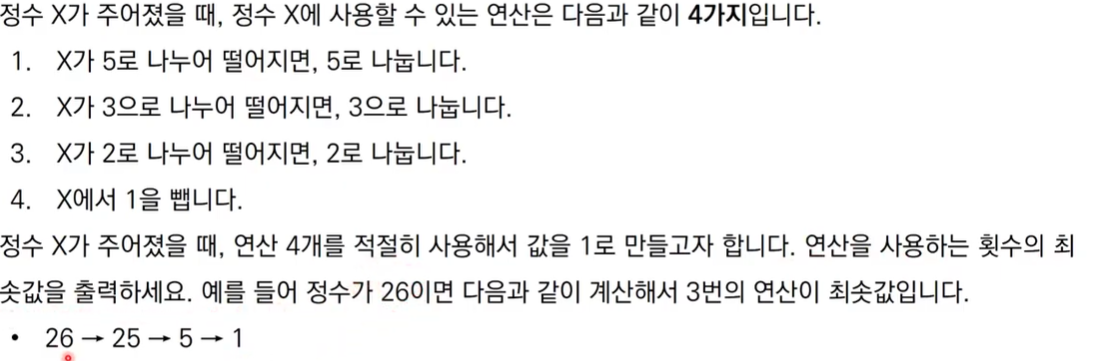

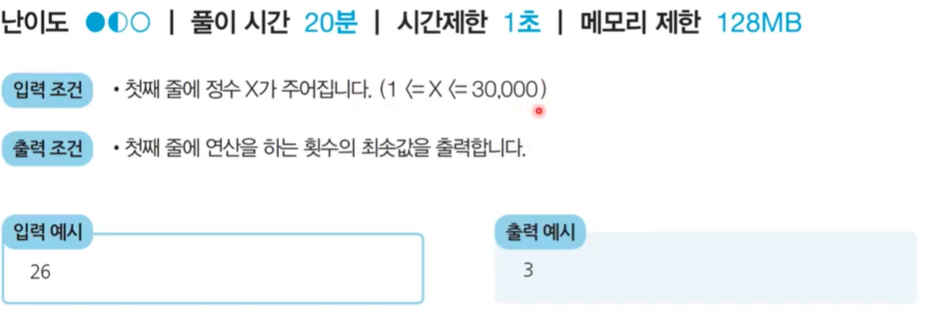

In [ ]:
x = int(input())

d = [0] * 30001 #1부터 30000까지 DP 테이블 초기화

#1의 경우는 연산이 필요가 없으므로 0으로 초기화됨

for i in range(2, x + 1): #2부터 시작
    d[i] = d[i - 1] + 1 #현재의 수에서 1을 빼는 경우에서 1을 더한 값

    if i % 2 == 0:
          d[i] = min(d[i], d[i//2] + 1)
    if i % 3 == 0:
          d[i] = min(d[i], d[i//3] + 1)
    if i % 5 == 0:
          d[i] = min(d[i], d[i//5] + 1)

print(d[x])



26
3


# 효율적인 화폐 구성
*   ai = 금액 i를 만들 수 있는 최소한의 화폐 개수
*   k = 각 화폐의 단위
*   점화식: 각 화폐 단위인 k를 하나씩 확인하며
1.   ai-k를 만드는 방법이 존재하는 경우, ai = min(ai, ai-k + 1)
2.   ai-k를 만드는 방법이 존재하지 않는 경우, ai = INF





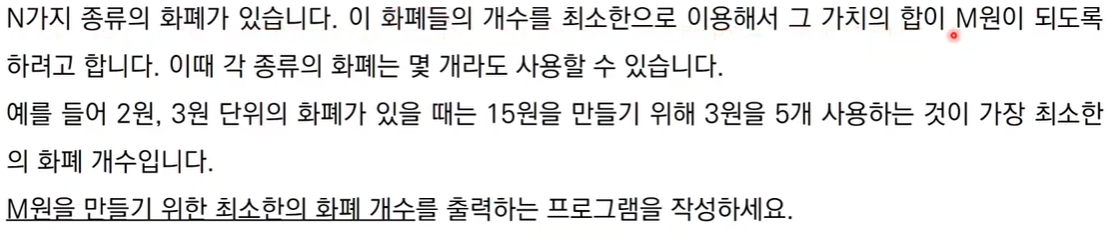

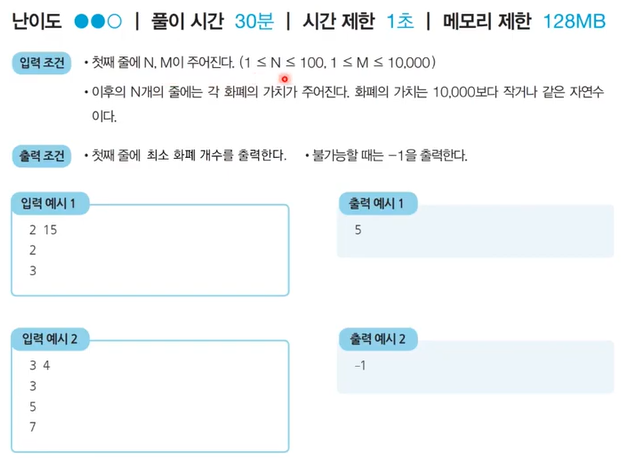



> 인덱스 0, 1, 2, 3, 4, 5, 6, 7

> 값  0, 10001, 1, 1, 2, 1, 2, 2

1.   초기화
*   각 인덱스에 해당하는 값으로 INF(무한) 값 설정
*   INF은 특정 금액을 만들 수 있는 화폐 구성이 가능하지 않다는 의미를 가짐
*   본 문제는 10001을 사용할 수 있음

2.   화폐 단위인 2를 확인 후 점화식에 따라 리스트 갱신

3.   세번째 화폐 단위인 5를 확인 후 리스트 갱신



In [ ]:
n, m = map(int, input().split())

#N개의 화폐 단위 정보 입력 받기
array = []
for i in range(n):
    array.append(int(input()))

d = [10001] * (m + 1)

d[0] = 0
for i in range(n):
    for j in range(array[i], m + 1):
        if d[j - array[i]] = 


